In [11]:
import pandas as pd
import numpy as np
import mlflow.tensorflow

In [12]:
df = pd.read_csv('../data/cancer_classification.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

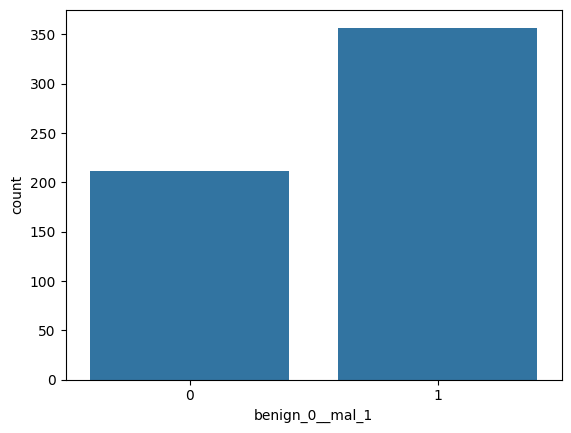

In [16]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

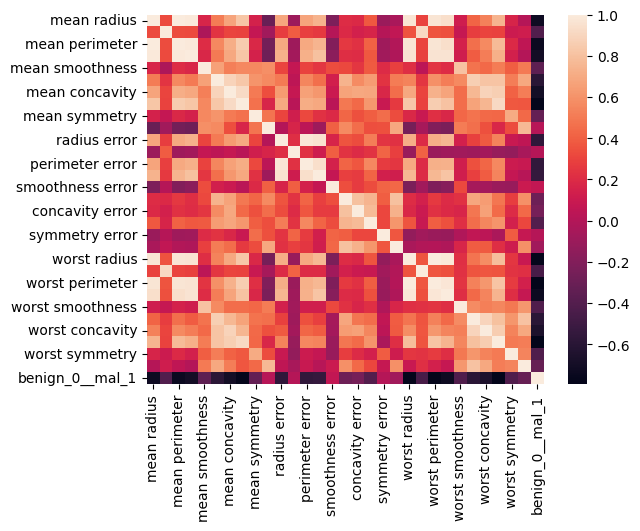

In [17]:
sns.heatmap(df.corr())

In [18]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

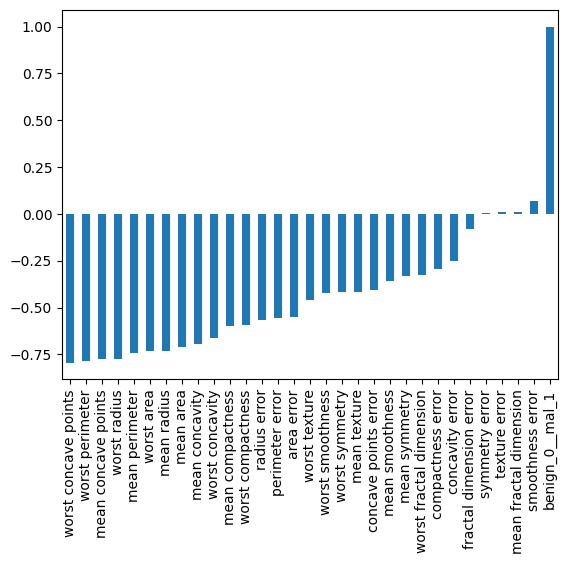

In [19]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

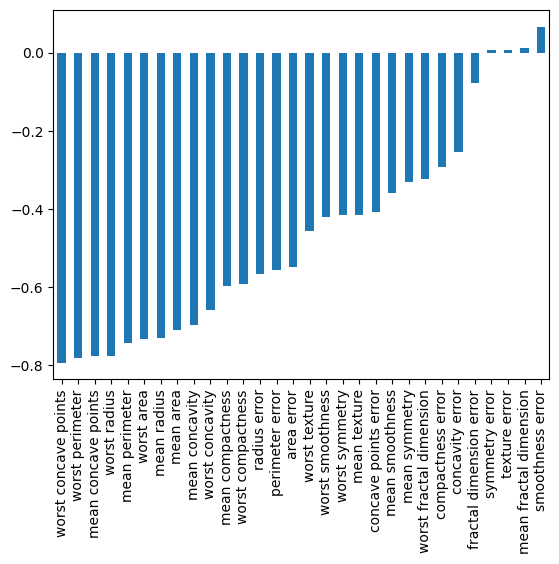

In [20]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [21]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)

MinMaxScaler()

In [27]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [29]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
mlflow.set_experiment("keras-breast-cancer")
mlflow.start_run(run_name="Run_1")

2023/11/08 15:39:39 INFO mlflow.tracking.fluent: Experiment with name 'keras-breast-cancer' does not exist. Creating a new experiment.


<ActiveRun: >

In [32]:
mlflow.tensorflow.autolog(every_n_iter=2)

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [33]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

2023/11/08 15:39:40 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'
2023/11/08 15:39:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\DiMo634\AppData\Local\anaconda3\envs\ml\lib\site-packages\mlflow\tensorflow\_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600
14/14 [==============================] - 1s 33ms/step - loss: 0.6763 - val_loss: 0.6604
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6457 - val_loss: 0.6324
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6175 - val_loss: 0.6031
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5867 - val_loss: 0.5692
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5490 - val_loss: 0.5270
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5073 - val_loss: 0.4837
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4656 - val_loss: 0.4409
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4256 - val_loss: 0.3989
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3881 - val_loss: 0.3582
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3522 - val_loss: 0.3233
Epoch 11

2023/11/08 15:40:48 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/11/08 15:40:48 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmpa5q762nf\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmpa5q762nf\model\data\model\assets
2023/11/08 15:41:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\DiMo634\AppData\Local\anaconda3\envs\ml\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [34]:
mlflow.end_run()

In [35]:
# model.history.history

In [36]:
model_loss = pd.DataFrame(model.history.history)

In [37]:
# model_loss

<Axes: >

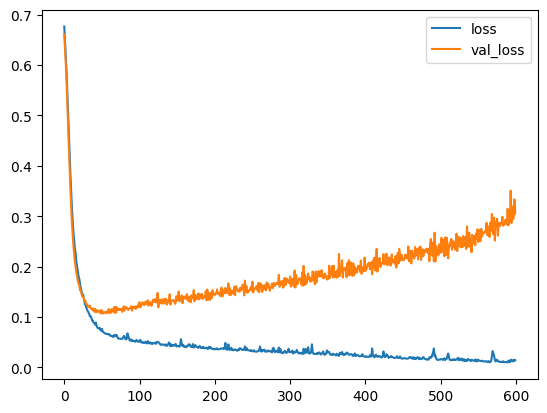

In [38]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [39]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [42]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

2023/11/08 15:41:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9750a0374d014191abd05aff51ea8824', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023/11/08 15:41:08 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'


2023/11/08 15:41:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\DiMo634\AppData\Local\anaconda3\envs\ml\lib\site-packages\mlflow\tensorflow\_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600
 1/14 [=>............................] - ETA: 19s - loss: 0.6886WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.0030s). Check your callbacks.


14/14 [==============================] - 2s 20ms/step - loss: 0.6765 - val_loss: 0.6578
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6439 - val_loss: 0.6239
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6082 - val_loss: 0.5816
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5641 - val_loss: 0.5328
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5164 - val_loss: 0.4835
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4712 - val_loss: 0.4359
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4247 - val_loss: 0.3945
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3835 - val_loss: 0.3490
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3442 - val_loss: 0.3146
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3135 - val_loss: 0.2822
Epoch 11/600
14/14 [

2023/11/08 15:41:19 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/11/08 15:41:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmps4k4e2mt\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmps4k4e2mt\model\data\model\assets


<Axes: >

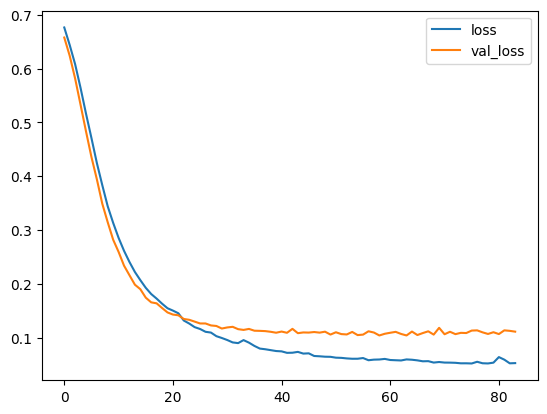

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

2023/11/08 15:41:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fb7a0423caec4251bcc9d00e147b8942', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2023/11/08 15:41:34 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'
2023/11/08 15:41:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\DiMo634\AppData\Local\anaconda3\envs\ml\lib\site-packages\mlflow\tensorflow\_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600
14/14 [==============================] - 2s 16ms/step - loss: 0.7020 - val_loss: 0.6811
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6628 - val_loss: 0.6493
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6563 - val_loss: 0.6183
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6413 - val_loss: 0.5903
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6032 - val_loss: 0.5623
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5963 - val_loss: 0.5346
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5601 - val_loss: 0.5000
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5186 - val_loss: 0.4598
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4947 - val_loss: 0.4292
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4934 - val_loss: 0.4036
Epoch 1

2023/11/08 15:41:53 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2023/11/08 15:41:53 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmp134yfgpa\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\DiMo634\AppData\Local\Temp\tmp134yfgpa\model\data\model\assets


<Axes: >

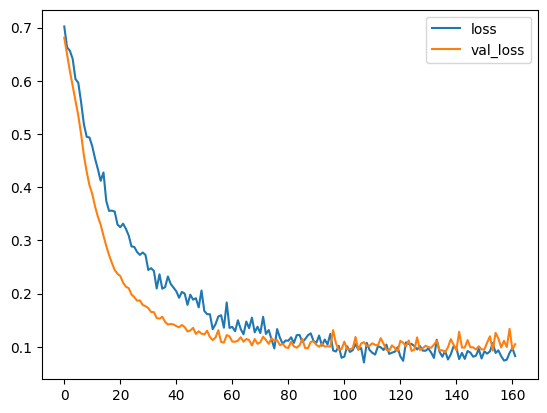

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [52]:
predictions = model.predict(X_test)
predictions_binary = [1 if p > 0.5 else 0 for p in predictions]

5/5 [==============================] - 0s 2ms/step


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,predictions_binary))

[[54  1]
 [ 3 85]]
